In [1]:
from __future__ import division

import collections
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## NN libs
import keras
from keras import backend as K
from keras import regularizers
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
from keras.layers import Input, Dense, Activation, Reshape, Dropout, Flatten, Lambda
from keras.layers import Conv2DTranspose, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, UpSampling2D, UpSampling1D 
from keras.layers import LocallyConnected1D, LocallyConnected2D, LSTM, RepeatVector
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import TensorBoard

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import config
import os, numpy as np, pandas, sklearn, scipy.signal as signal
import mido
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# local libs
import config, models, setup
import midi
from midi import generators as g
from utils import io, models_io, utils, plot

In [4]:
context = setup.init()

 Context :: namedtuple(
[ max_t = float
, dt = float
, n_timestesp = int
, note_length = int
, bpm = float
, tempo = float
, ticks_per_beat = int
]

Setting up params

max min f 10.0 0.5
 >> Context(max_t=2.0, dt=0.05, n_timesteps=40, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
 sample length:  40.000000
 max_f: 10.000000, min_f: 0.500000


In [5]:
n = 100 * 1
dim4 = True
multiTrack = True
reduce_dims = midi.ReduceDimsOptions.MIDIFILE # GLOBAL
dn = 'drum_midi/'
x_train, labels = setup.import_data(context, n, dim4=dim4, reduce_dims=reduce_dims, dirname=dn, multiTrack=multiTrack, r=True)


Importing midi-data

Encoding midi-data
 100
> -> multi-track = True MidiFile
 [INFO] : 
 |  True
<meta message track_name name='01 8th Hat\x00' time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=36 notated_32nd_notes_per_beat=8 time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=36 notated_32nd_notes_per_beat=8 time=0>
control_change channel=0 control=4 value=127 time=0
note_on channel=0 note=36 velocity=68 time=0
note_on channel=0 note=75 velocity=9 time=0
note_on channel=0 note=42 velocity=103 time=0.005208333333333333
note_off channel=0 note=36 velocity=64 time=0.03125
note_off channel=0 note=42 velocity=64 time=0.005208333333333333
note_on channel=0 note=42 velocity=85 time=0.203125
note_off channel=0 note=42 velocity=64 time=0.041666666666666664
control_change channel=0 control=4 value=127 time=0.078125
control_change channel=0 control=4 value=11 time=0
control_change channel=0 control=4 value=9 time=0.005208333333333333
c

control_change channel=0 control=4 value=15 time=0
control_change channel=0 control=4 value=13 time=0.020833333333333332
control_change channel=0 control=4 value=5 time=0.026041666666666664
control_change channel=0 control=4 value=18 time=0.03125
note_on channel=0 note=36 velocity=64 time=0
note_on channel=0 note=44 velocity=63 time=0.005208333333333333
control_change channel=0 control=4 value=68 time=0.010416666666666666
control_change channel=0 control=4 value=112 time=0.005208333333333333
note_on channel=0 note=39 velocity=99 time=0.015625
note_on channel=0 note=51 velocity=75 time=0
note_off channel=0 note=51 velocity=64 time=0
note_off channel=0 note=44 velocity=64 time=0.11458333333333333
note_off channel=0 note=39 velocity=64 time=0.08854166666666666
note_off channel=0 note=36 velocity=64 time=0.041666666666666664
note_on channel=0 note=51 velocity=57 time=0.09895833333333333
note_off channel=0 note=51 velocity=64 time=0
note_on channel=0 note=36 velocity=64 time=0.1197916666666

control_change channel=0 control=4 value=13 time=0
control_change channel=0 control=4 value=11 time=0.005208333333333333
control_change channel=0 control=4 value=1 time=0.015625
control_change channel=0 control=4 value=0 time=0.010416666666666666
note_on channel=0 note=44 velocity=109 time=0.046875
note_on channel=0 note=47 velocity=91 time=0.005208333333333333
note_off channel=0 note=47 velocity=64 time=0
control_change channel=0 control=4 value=127 time=0.010416666666666666
note_on channel=0 note=53 velocity=98 time=0
note_off channel=0 note=53 velocity=64 time=0.05208333333333333
note_off channel=0 note=44 velocity=64 time=0.026041666666666664
note_on channel=0 note=47 velocity=96 time=0.171875
note_off channel=0 note=47 velocity=64 time=0
control_change channel=0 control=4 value=127 time=0.22395833333333331
control_change channel=0 control=4 value=83 time=0
note_on channel=0 note=36 velocity=70 time=0.010416666666666666
<meta message track_name name='03 8th Ride \x00' time=0>
<meta

<meta message track_name name='02 8th Cym\x00' time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=36 notated_32nd_notes_per_beat=8 time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=36 notated_32nd_notes_per_beat=8 time=0>
control_change channel=0 control=4 value=127 time=0
note_on channel=0 note=36 velocity=61 time=0
note_off channel=0 note=36 velocity=64 time=0
note_on channel=0 note=48 velocity=90 time=0
note_off channel=0 note=48 velocity=64 time=0
note_on channel=0 note=45 velocity=7 time=0.005208333333333333
note_off channel=0 note=45 velocity=64 time=0.16666666666666666
control_change channel=0 control=4 value=127 time=0.03645833333333333
control_change channel=0 control=4 value=96 time=0
control_change channel=0 control=4 value=76 time=0.010416666666666666
control_change channel=0 control=4 value=58 time=0.010416666666666666
control_change channel=0 control=4 value=40 time=0.010416666666666666
control_change channel=0 co

note_off channel=0 note=40 velocity=64 time=0
control_change channel=0 control=4 value=125 time=0.15625
control_change channel=0 control=4 value=68 time=0
note_on channel=0 note=40 velocity=86 time=0
note_off channel=0 note=40 velocity=64 time=0
control_change channel=0 control=4 value=60 time=0.026041666666666664
control_change channel=0 control=4 value=73 time=0.046875
note_on channel=0 note=44 velocity=3 time=0.015625
control_change channel=0 control=4 value=95 time=0.005208333333333333
control_change channel=0 control=4 value=118 time=0.020833333333333332
control_change channel=0 control=4 value=127 time=0.015625
note_on channel=0 note=40 velocity=55 time=0.046875
<meta message track_name name='01 8th Hat\x00' time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=36 notated_32nd_notes_per_beat=8 time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=36 notated_32nd_notes_per_beat=8 time=0>
control_change channel=0 control=4 value=1

<meta message track_name name='06 8th hat\x00' time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=36 notated_32nd_notes_per_beat=8 time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=36 notated_32nd_notes_per_beat=8 time=0>
control_change channel=0 control=4 value=127 time=0
note_on channel=0 note=36 velocity=60 time=0
note_on channel=0 note=46 velocity=79 time=0
control_change channel=0 control=4 value=101 time=0.05208333333333333
control_change channel=0 control=4 value=96 time=0.010416666666666666
control_change channel=0 control=4 value=91 time=0.010416666666666666
note_off channel=0 note=46 velocity=64 time=0.005208333333333333
note_off channel=0 note=36 velocity=64 time=0.005208333333333333
control_change channel=0 control=4 value=97 time=0.015625
control_change channel=0 control=4 value=97 time=0.078125
control_change channel=0 control=4 value=102 time=0
control_change channel=0 control=4 value=107 time=0.01041666666666666

note_on channel=0 note=36 velocity=113 time=0.0625
note_on channel=0 note=42 velocity=86 time=0.005208333333333333
note_off channel=0 note=36 velocity=64 time=0.11458333333333333
note_off channel=0 note=42 velocity=64 time=0.010416666666666666
note_on channel=0 note=42 velocity=101 time=0.11458333333333333
note_off channel=0 note=42 velocity=64 time=0.11458333333333333
note_on channel=0 note=36 velocity=109 time=0.140625
note_on channel=0 note=38 velocity=116 time=0
note_on channel=0 note=42 velocity=97 time=0
note_off channel=0 note=36 velocity=64 time=0.09895833333333333
note_off channel=0 note=42 velocity=64 time=0.03125
note_off channel=0 note=38 velocity=64 time=0.015625
note_on channel=0 note=42 velocity=93 time=0.109375
note_off channel=0 note=42 velocity=64 time=0.13541666666666666
note_on channel=0 note=36 velocity=113 time=0.109375
<meta message track_name name='03 8th Hat\x00' time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=36 notated_32nd_not

note_on channel=0 note=61 velocity=103 time=0.015625
note_off channel=0 note=61 velocity=64 time=0.09895833333333333
note_on channel=0 note=47 velocity=98 time=0.020833333333333332
note_on channel=0 note=36 velocity=102 time=0.005208333333333333
note_on channel=0 note=44 velocity=104 time=0
note_off channel=0 note=47 velocity=64 time=0.08854166666666666
note_off channel=0 note=36 velocity=64 time=0.020833333333333332
note_off channel=0 note=44 velocity=64 time=0.005208333333333333
note_on channel=0 note=31 velocity=96 time=0.13020833333333331
note_on channel=0 note=61 velocity=106 time=0
note_off channel=0 note=31 velocity=64 time=0.109375
note_off channel=0 note=61 velocity=64 time=0
note_on channel=0 note=61 velocity=26 time=0.03125
note_off channel=0 note=61 velocity=64 time=0.08333333333333333
note_on channel=0 note=36 velocity=103 time=0.03645833333333333
note_on channel=0 note=41 velocity=102 time=0
note_off channel=0 note=36 velocity=64 time=0.078125
note_off channel=0 note=41 v

<meta message track_name name='07 8th Multi\x00' time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=36 notated_32nd_notes_per_beat=8 time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=36 notated_32nd_notes_per_beat=8 time=0>
note_on channel=0 note=36 velocity=107 time=0
note_on channel=0 note=43 velocity=101 time=0
note_on channel=0 note=30 velocity=97 time=0.005208333333333333
note_on channel=0 note=31 velocity=99 time=0
note_off channel=0 note=30 velocity=64 time=0.09895833333333333
note_off channel=0 note=31 velocity=64 time=0.005208333333333333
note_off channel=0 note=36 velocity=64 time=0.010416666666666666
note_off channel=0 note=43 velocity=64 time=0.010416666666666666
note_on channel=0 note=31 velocity=86 time=0.11979166666666666
note_off channel=0 note=31 velocity=64 time=0.10416666666666666
note_on channel=0 note=41 velocity=107 time=0.14583333333333331
note_on channel=0 note=30 velocity=97 time=0.005208333333333333
no

<meta message track_name name='08 Fill 1\x00' time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=36 notated_32nd_notes_per_beat=8 time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=36 notated_32nd_notes_per_beat=8 time=0>
note_on channel=0 note=36 velocity=98 time=0
note_on channel=0 note=55 velocity=98 time=0
note_off channel=0 note=36 velocity=64 time=0.11979166666666666
note_off channel=0 note=55 velocity=64 time=0.020833333333333332
note_on channel=0 note=43 velocity=80 time=0.109375
note_off channel=0 note=43 velocity=64 time=0.109375
note_on channel=0 note=40 velocity=96 time=0.13541666666666666
note_on channel=0 note=34 velocity=86 time=0.005208333333333333
note_on channel=0 note=43 velocity=85 time=0.005208333333333333
note_off channel=0 note=40 velocity=64 time=0.109375
note_off channel=0 note=34 velocity=64 time=0.020833333333333332
note_off channel=0 note=43 velocity=64 time=0.005208333333333333
note_on channel=0 note

In [6]:
# n = 1000
# min_f = 0
# max_f = 3
# x_train, params = g.gen_data_complex(context, n, max_f=max_f, min_f=min_f,
#     n_polyrythms=1,
#     n_channels=3,
#     d_phase=True,
#     return_params=True,
#     dim4=dim4,
#     multiTrack=multiTrack)

In [7]:
x_train.shape

(100, 40, 10, 1)

In [8]:
m = int(x_train.shape[0] * 0.9)
[x_train.shape, m]

[(100, 40, 10, 1), 90]

In [9]:
x_test = x_train[m:]
x_train = x_train[:m]

m (40, 10)


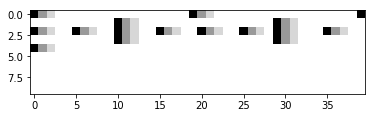

m (40, 10)


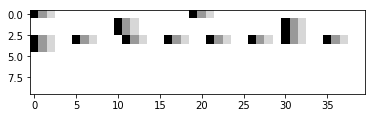

m (40, 10)


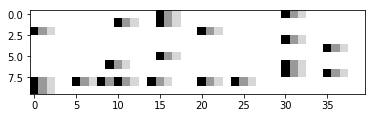

["../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/01 8th Hat.mid",
 "../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/02 8th Ride.mid",
 "../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/03 16th Snare.mid",
 "../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/04 8th Ride.mid"]

In [10]:
plot.single(x_train[0, :50,:,0])
plot.single(x_train[1, :50,:,0])
plot.single(x_train[2, :50,:,0])
labels[0:4]

In [11]:
input_shape = x_train[0].shape
timesteps = input_shape[0]
notes = input_shape[1]
input_shape

(40, 3, 1)

In [12]:
latent_dim = 2
intermediate_dim = 128
epsilon_std = 1.0

In [13]:
def encoder(input_size, dropout=0.05):
    encoder_input = Input(shape=input_size)
    
    # Convolve & Pool
    h = encoder_input
    h = Reshape(input_shape[:-1])(h)
    h = Conv1D(32, kernel_size=2, strides=2, activation='relu', padding='valid')(h)
    h = Conv1D(64, kernel_size=2, strides=1, activation='relu', padding='valid')(h)
    h = Conv1D(64, kernel_size=2, strides=2, activation='relu', padding='valid')(h)
    shape = K.int_shape(h)[1:]
    h = Reshape(list(shape) + [1])(h)
    h = Conv2D(128, kernel_size=(2,2), strides=1, activation='relu', padding='valid')(h)
    h = MaxPooling2D((2, 1))(h)

    h = Conv2D(64, kernel_size=(2,2), strides=2, activation='relu', padding='valid')(h)
#     print(shape, list(shape))

    # Dense layers
#     h = Dropout(dropout)(h) # uncomment when using larger batches
    h = Flatten()(h)
    h = Dropout(dropout)(h) # uncomment when using larger batches

    h = Dense(intermediate_dim, activation='relu')(h)
   
    # Z Mean, Variance
    z_mean = Dense(latent_dim, name='z_mean')(h) # , activation='relu'
    z_log_var = Dense(latent_dim, name='z_log_var')(h) # , activation='relu'
        
    encoder_output = [z_mean, z_log_var]
    encoder_model = Model(encoder_input, encoder_output, name='encoder_model-')
    return encoder_model, encoder_input, z_mean, z_log_var

In [14]:
encoder_model, encoder_input, z_mean, z_log_var = encoder(input_shape)
encoder_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 40, 3, 1)     0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 40, 3)        0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 20, 32)       224         reshape_1[0][0]                  
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 19, 64)       4160        conv1d_1[0][0]                   
__________________________________________________________________________________________________
conv1d_3 (

In [15]:
sample_ = lambda args: models.sample(args, z_mean, z_log_var, latent_dim, epsilon_std)

In [16]:
# z = Lambda(sampling)([z_mean, z_log_var])
z_input = encoder_model(encoder_input)
z_output = Lambda(sample_)(z_input)
# z_output = Lambda(sampl_, output_shape=(latent_dim,))(encoder_input)

In [17]:
def list_decoders(output_size, p='valid'):
    # decoder_input = z_output
    # h = decoder_input
    # :output_shape = (timesteps, channels, channels) || (batches, filters, timesteps, channels)
    # keras offers just Conv2DTranspose and not Conv1DTranspose
    # - use 2D images during upsampling :: (timesteps, notes, channels) => (timesteps, notes, filters)
    # - use 1D images to optimize reconstruction :: (timesteps, filters) => (timesteps, notes)
    
    # image_data_format = 'channels_last'
    # goal shape: (timesteps, notes, channels)
    # start with the 'reverse': lots of small imgs => few large img
    
    timesteps, notes, channels = output_size
    m = 4 # multiplier for dims
    
    # at the start of upsampling, the image-structure does not yet have to correspond to the goal structure 
    # ?TODO use y*y*y starting dims, may conv, and only then correct the structure (?)
    output_shape = (timesteps, notes, channels)
    
    # we instantiate these layers separately so as to reuse them later
    decoders = []
#     decoders += [ Dense(intermediate_dim, activation='relu') ]
    decoders += [ Dense(intermediate_dim, activation='relu') ]
    decoders += [ Dense(intermediate_dim * 2, activation='relu') ]
    decoders += [ Dense(intermediate_dim * 1, activation='relu') ]
    
    decoders += [ Dense(np.prod(output_shape), activation='relu') ]
#     decoders += [ Reshape(output_shape[-3:]) ]
    
    # Convolve & Pool
    
    # Note that the kernel windows do not yet correspond to 'temporal' features, but rather to just spatial features
    k = (3,2) # (2,1) :: (timesteps, notes)
    s = (1,3)
    timesteps_ = int(timesteps / 2)
    
#     decoders += [ Conv2DTranspose(timesteps_, kernel_size=k, strides=3, activation='relu', padding=p) ]
#     decoders += [ Conv2DTranspose(32, kernel_size=k, strides=3, activation='relu', padding=p) ]
#     # decoder += [Conv2DTranspose(32, kernel_size=k, strides=3, activation='relu', padding=p)]
#     decoders += [ Conv2DTranspose(16, kernel_size=k, strides=(3,1), activation='relu', padding=p)]
#     decoders += [ Conv2DTranspose(16, kernel_size=k, strides=3, activation='relu', padding=p)]
    
    # 'end' of upsampling
#     decoders += [ Conv2D(1, kernel_size=(1,2), strides=1, activation='relu', padding=p) ]
    # shape = ()
    # decoder_reshape2 = Reshape(dims[0:2])
    # #     h = Conv1D(16, kernel_size=2, strides=1, activation='relu', padding=p)(h)
    # decoder_conv2 = Conv1D(notes * m, kernel_size=2, strides=2, activation='relu', padding=p)
    
    
    # Mean (output)
    #     h = Conv2D(1, kernel_size=1, strides=s, activation='sigmoid', padding='same')(h)
    output_shape = (timesteps, notes, channels)
    
#     decoders += [ Flatten()] # note that [].append != [] = []
    decoders += [ Dense(np.prod(output_shape), activation='sigmoid')]
    decoders += [ Reshape(output_shape)]
    return decoders

In [18]:
decoders = list_decoders(input_shape)

In [19]:
decoded = utils.composition(decoders, z_output, verbose=False)

In [20]:
# instantiate VAE model
vae_input = encoder_input
vae_output = decoded
vae = Model(vae_input, vae_output)
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 40, 3, 1)     0                                            
__________________________________________________________________________________________________
encoder_model- (Model)          [(None, 2), (None, 2 554660      input_1[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 2)            0           encoder_model-[1][0]             
                                                                 encoder_model-[1][1]             
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 128)          384         lambda_1[0][0]                   
__________

In [21]:
# Compute VAE loss
def vae_loss(beta=1.):
    # y_true, y_pred, z_mean, z_log_var, timesteps=150, notes=3, beta=1.
    xent_loss = timesteps * notes * keras.metrics.binary_crossentropy(K.flatten(vae_input), K.flatten(vae_output))
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    vae_loss = K.mean(xent_loss + beta * kl_loss)
    return vae_loss

vae_loss = vae_loss(beta=1)
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
# vae.compile(optimizer=optimizer, loss=loss, metrics=metrics)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Output "reshape_3" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "reshape_3" during training.
  # This is added back by InteractiveShellApp.init_path()


In [22]:
batch_size = 10
epochs = 50
params = {'batch_size': batch_size, 'return_y': False}

In [23]:
phase_mod = 0.01
whitening = False

# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by dataset std
#         samplewise_std_normalization=False,  # divide each input by its std
# #         zca_epsilon=10,
#         zca_whitening=whitening,
#         rotation_range=0,  # randomly rotate images in 0 to 180 degrees
#         width_shift_range=0.,  # note-channel mod, but not shuffled
#         height_shift_range=phase_mod,  # start_t, phase
#         horizontal_flip=False,  # reverse
#         vertical_flip=False)

# # datagen.fit(x_train)

In [24]:
x_train.shape

(90, 40, 3, 1)

In [25]:
m = 1000
useDataGenerator = False
useDataGenerator = True

print('batch_size =', batch_size)
if useDataGenerator:
    datagen = models.ImageDataGenerator(x_train, batch_size, phase_mod, whitening)
    history = collections.defaultdict(list)
    n_batches = datagen.__len__()
    for e in range(epochs):
        print('\n[Epoch %i/%i] >>>>>>>>>>>>' % (e, epochs))
        for batch_i, (x_batch, y_batch) in enumerate(datagen.flow(x_train[:m], x_train[:m], batch_size)):
            print(' Batch %i/%i' % (batch_i,n_batches))
            x = x_batch
#             x = datagen.shuffle_3rd_dim(x_batch)
            h = vae.fit(x, verbose=0)
            for k,v in h.history.items(): 
                print(k,[round(v_,) for v_ in v])
                history[k].append(v)
            if batch_i >= n_batches:
                break
else:
    h = vae.fit(x_train[:m], epochs=epochs, validation_data=(x_test, None))
    history = h.history

batch_size = 10

[Epoch 0/50] >>>>>>>>>>>>
 Batch 0/9
loss [83.0]
 Batch 1/9
loss [82.0]
 Batch 2/9
loss [80.0]
 Batch 3/9
loss [68.0]
 Batch 4/9
loss [234.0]
 Batch 5/9
loss [64.0]
 Batch 6/9
loss [64.0]
 Batch 7/9
loss [63.0]
 Batch 8/9
loss [54.0]
 Batch 9/9
loss [53.0]

[Epoch 1/50] >>>>>>>>>>>>
 Batch 0/9
loss [55.0]
 Batch 1/9
loss [49.0]
 Batch 2/9
loss [49.0]
 Batch 3/9
loss [51.0]
 Batch 4/9
loss [53.0]
 Batch 5/9
loss [47.0]
 Batch 6/9
loss [44.0]
 Batch 7/9
loss [45.0]
 Batch 8/9
loss [43.0]
 Batch 9/9
loss [43.0]

[Epoch 2/50] >>>>>>>>>>>>
 Batch 0/9
loss [40.0]
 Batch 1/9
loss [44.0]
 Batch 2/9
loss [55.0]
 Batch 3/9
loss [46.0]
 Batch 4/9
loss [42.0]
 Batch 5/9
loss [38.0]
 Batch 6/9
loss [39.0]
 Batch 7/9
loss [51.0]
 Batch 8/9
loss [44.0]
 Batch 9/9
loss [39.0]

[Epoch 3/50] >>>>>>>>>>>>
 Batch 0/9
loss [40.0]
 Batch 1/9
loss [45.0]
 Batch 2/9
loss [43.0]
 Batch 3/9
loss [36.0]
 Batch 4/9
loss [41.0]
 Batch 5/9
loss [41.0]
 Batch 6/9
loss [41.0]
 Batch 7/9
loss [38.0]
 

loss [31.0]
 Batch 3/9
loss [32.0]
 Batch 4/9
loss [35.0]
 Batch 5/9
loss [29.0]
 Batch 6/9
loss [43.0]
 Batch 7/9
loss [35.0]
 Batch 8/9
loss [36.0]
 Batch 9/9
loss [34.0]

[Epoch 33/50] >>>>>>>>>>>>
 Batch 0/9
loss [44.0]
 Batch 1/9
loss [31.0]
 Batch 2/9
loss [31.0]
 Batch 3/9
loss [33.0]
 Batch 4/9
loss [34.0]
 Batch 5/9
loss [29.0]
 Batch 6/9
loss [31.0]
 Batch 7/9
loss [38.0]
 Batch 8/9
loss [30.0]
 Batch 9/9
loss [29.0]

[Epoch 34/50] >>>>>>>>>>>>
 Batch 0/9
loss [32.0]
 Batch 1/9
loss [32.0]
 Batch 2/9
loss [36.0]
 Batch 3/9
loss [27.0]
 Batch 4/9
loss [35.0]
 Batch 5/9
loss [30.0]
 Batch 6/9
loss [40.0]
 Batch 7/9
loss [30.0]
 Batch 8/9
loss [38.0]
 Batch 9/9
loss [31.0]

[Epoch 35/50] >>>>>>>>>>>>
 Batch 0/9
loss [35.0]
 Batch 1/9
loss [31.0]
 Batch 2/9
loss [37.0]
 Batch 3/9
loss [34.0]
 Batch 4/9
loss [39.0]
 Batch 5/9
loss [33.0]
 Batch 6/9
loss [32.0]
 Batch 7/9
loss [30.0]
 Batch 8/9
loss [26.0]
 Batch 9/9
loss [32.0]

[Epoch 36/50] >>>>>>>>>>>>
 Batch 0/9
loss [32.0]
 B

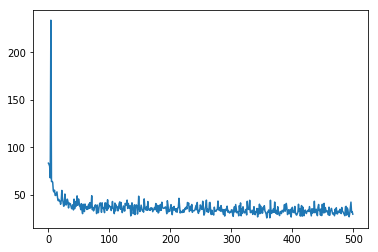

In [26]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])

m (40, 3)


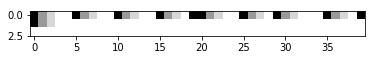

m (40, 3)


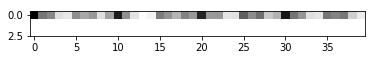

m (40, 3)


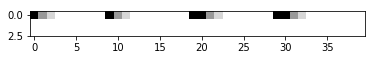

m (40, 3)


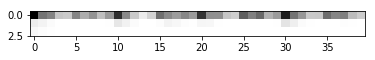

m (40, 3)


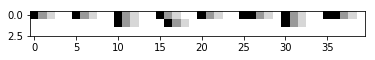

m (40, 3)


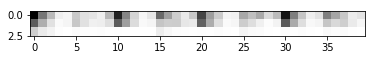

In [27]:
i = 0
j = 30
k = -1
x = vae.predict(x_train[:100])
plot.single(x_train[i, :50, :, 0])
plot.single(x[i, :50, :, 0])
plot.single(x_train[j, :50, :, 0])
plot.single(x[j, :50, :, 0])
plot.single(x_train[k, :50, :, 0])
plot.single(x[k, :50, :, 0])

In [28]:
x.shape

(90, 40, 3, 1)

m (30, 3)


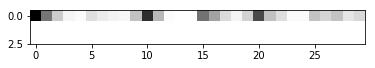

In [29]:
# min: these pixels are 'always' active
m = x.min(axis=0)
plot.multi(m[:30,:,0])

m (30, 3)


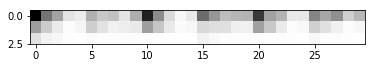

In [30]:
# mean
m = x.mean(axis=0)
plot.single(m[:30,:,0])

## Encoder + Generator
A model to project inputs on the latent space

In [31]:
# build a model to project inputs on the latent space
encoder = Model(encoder_input, z_mean)

In [32]:
x_test.shape

(10, 40, 3, 1)

In [33]:
m = 100
x_train_encoded = encoder.predict(x_train[:m], batch_size=batch_size)
x_train_encoded.shape

(90, 2)

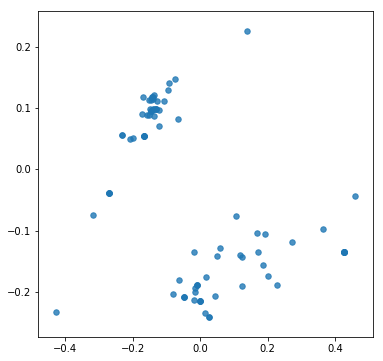

In [34]:
# y_test = range(x_train_encoded.shape[0])
y_test = np.concatenate([list(range(n)) for _ in range(int(m/n)+1)])[:m] / n
plt.figure(figsize=(6, 6))
plt.scatter(x_train_encoded[:, 0], x_train_encoded[:, 1], alpha=0.8, s=30) # c=y_test, 

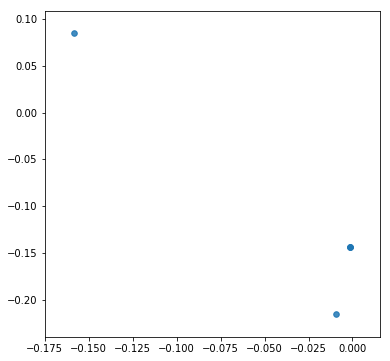

In [35]:
# display a 2D plot of the digit classes in the latent space
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], alpha=0.6, s=30) # , c=y_test
# plt.colorbar()

In [36]:
# build a digit generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim,))
_decoded = utils.composition(decoders, decoder_input, verbose=False)
generator = Model(decoder_input, _decoded)

In [37]:
# x_decoded[0].reshape(150,3)

In [38]:
x_train.shape

(90, 40, 3, 1)

(2,) [0. 0.]


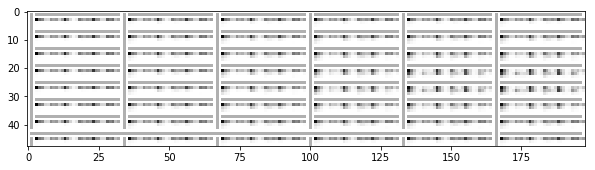

In [39]:
min_y = 0.01
max_y = 0.5
plot.latent(generator, batch_size,
       n=8,
       m=6,
       crop_size=30,
       margin_top=1,
       margin_left=1,
       min_x=0.05,
       max_x=0.95,
       min_y=min_y,
       max_y=max_y)

(2,) [0. 0.]


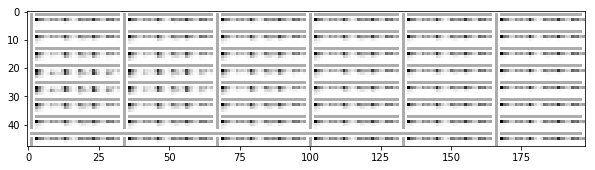

In [40]:
min_y2 = max_y
plot.latent(generator, batch_size,
       n=8,
       m=6,
       crop_size=30,
       margin_top=1,
       margin_left=1,
       min_x=0.05,
       max_x=0.95,
       min_y=min_y2,
       max_y=0.95)